In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [2]:
data=pd.read_csv("creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
fraud= data[data["Class"]==1]
normal= data[data["Class"]==0]

In [7]:
fraud.shape

(492, 31)

In [8]:
normal.shape

(284315, 31)

In [9]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

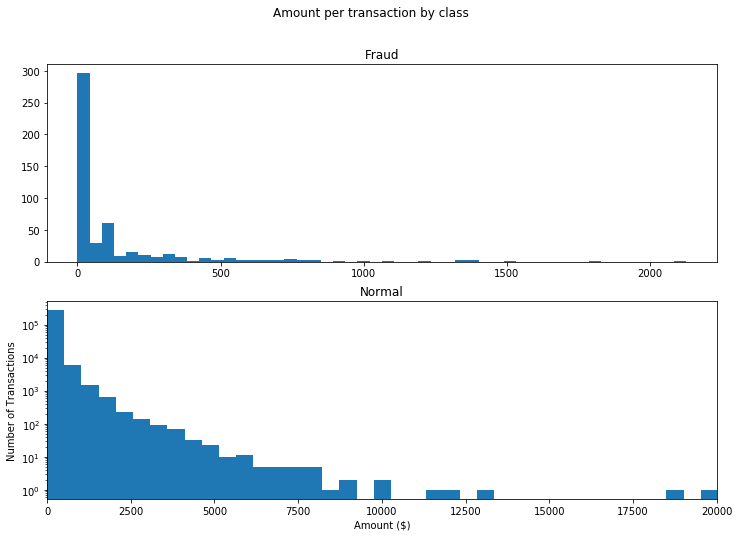

In [10]:
f,(ax1,ax2)=plt.subplots(2,1,figsize=(12,8))
bins=50
f.suptitle("Amount per transaction by class")
ax1.hist(fraud.Amount,bins=bins)
ax1.set_title("Fraud")
ax2.hist(normal.Amount,bins=bins)
ax2.set_title("Normal")
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

In [11]:
#Take only minimum amount of sampels

data1=data.sample(frac=0.1,random_state=43)

In [12]:
data1.shape

(28481, 31)

In [13]:
data1["Class"].value_counts()

0    28421
1       60
Name: Class, dtype: int64

In [14]:
Fraud=data1[data1["Class"]==1]
Normal=data1[data1["Class"]==0]

In [15]:
fraction=len(Fraud)/len(Normal)
print(fraction)

0.0021111150205833716


In [16]:
import seaborn as sns

In [17]:
corr_matrix=data1.corr()

In [18]:
corr_matrix["Class"].sort_values(ascending=False)

Class     1.000000
V11       0.187948
V4        0.171942
V2        0.127836
V27       0.032816
V8        0.027199
V21       0.025339
V25       0.024102
V20       0.021306
V19       0.011030
V28       0.010720
V26       0.001849
Amount   -0.002294
V15      -0.007566
V13      -0.008339
V24      -0.011208
V22      -0.012665
V23      -0.021759
Time     -0.026226
V6       -0.060247
V18      -0.111376
V5       -0.120863
V9       -0.125420
V1       -0.146502
V16      -0.197799
V7       -0.250553
V10      -0.255346
V3       -0.257271
V12      -0.298644
V17      -0.320780
V14      -0.349306
Name: Class, dtype: float64

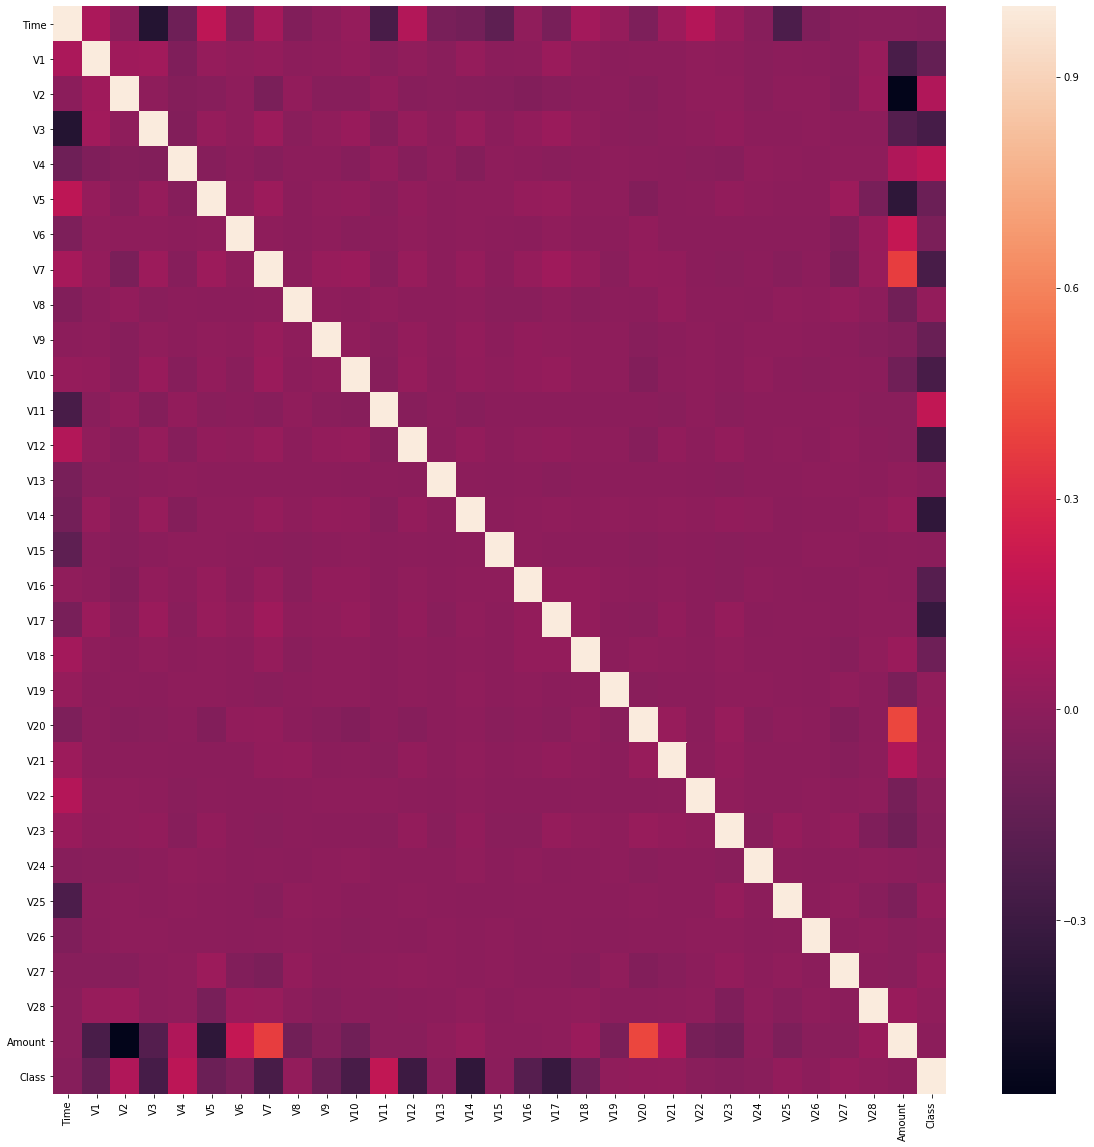

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(data1.corr())

In [20]:
X=data1.drop("Class",axis=1)

In [21]:
X.shape

(28481, 30)

In [22]:
Y=data1["Class"]

In [23]:
Y.shape

(28481,)

In [24]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
116085,74137.0,-1.361745,0.780398,0.493537,0.779496,-0.080206,0.169270,0.335758,0.493880,-0.521924,...,-0.588804,0.173493,0.547959,0.224393,-0.342181,-0.300761,-0.306579,-0.202904,0.006313,68.85
206493,136231.0,2.073311,0.265580,-1.745544,0.492756,0.286109,-1.427709,0.310907,-0.422277,0.505541,...,-0.166542,0.191552,0.767662,-0.043917,-0.156863,0.295408,-0.096150,0.002101,-0.031715,0.78
145335,86838.0,-0.399908,-1.321966,-0.845327,-2.411469,1.114166,-1.437364,1.110978,-0.771218,-2.942400,...,0.294972,0.256023,0.896290,-0.036145,0.736655,1.039259,0.244197,-0.312491,-0.251445,159.40
201692,133993.0,-1.036573,-2.574157,0.652199,-2.210011,-0.574365,-0.566596,-0.491650,0.154731,-1.856954,...,0.406363,0.134752,-0.061675,0.660786,-0.508381,0.108543,-0.167297,-0.120329,0.003283,266.00
222845,143141.0,2.256626,-1.518978,-0.692405,-1.637132,-1.436432,-0.347211,-1.430306,0.023128,-1.135951,...,-0.489080,-0.120598,0.127961,0.228358,-0.439873,-0.313481,-0.166751,0.020676,-0.061106,11.20


In [25]:
Y.shape

(28481,)

The data is ready now we can use the models to classify the data and obtain predictions
### We would use Isolation Forest Algorithm and Local Outlier Factor(LOF) Algorithm. We would compare the results.

Isolation Forest Algorithm: Basically assigns very low values to the outliers which help them seperate.
Local Outlier Factor(LOF) Algorithm: Uses high density region as a group and regions with lower density as OutLiers

In [26]:
model1=IsolationForest(n_estimators=100,max_samples=len(X),contamination=fraction,random_state=1,verbose=0)

In [27]:
model1.fit(X)

IsolationForest(behaviour='deprecated', bootstrap=False,
                contamination=0.0021111150205833716, max_features=1.0,
                max_samples=28481, n_estimators=100, n_jobs=None,
                random_state=1, verbose=0, warm_start=False)

In [28]:
scores_prediction = model1.decision_function(X)
y_pred = model1.predict(X)

In [29]:
#Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [30]:
print(accuracy_score(Y,y_pred))

0.9976475545100242


In [31]:
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28421
           1       0.44      0.45      0.45        60

    accuracy                           1.00     28481
   macro avg       0.72      0.72      0.72     28481
weighted avg       1.00      1.00      1.00     28481



In [32]:
n_errors = (y_pred != Y).sum()

In [33]:
n_errors

67

In [34]:
model2=LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=fraction)

In [35]:
y_pred1=model2.fit_predict(X)

In [42]:
#Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
y_pred1[y_pred1 == 1] = 0
y_pred1[y_pred1 == -1] = 1

In [43]:
print(accuracy_score(Y,y_pred1))

0.9960675538078017


In [44]:
print(classification_report(Y,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28421
           1       0.00      0.00      0.00        60

    accuracy                           1.00     28481
   macro avg       0.50      0.50      0.50     28481
weighted avg       1.00      1.00      1.00     28481



In [45]:
n_errors1=(y_pred1!=Y).sum()

In [46]:
n_errors1

112

### Hence we can conclude Isolation Forest algo is better then Local Outlier Factor algo in this case.

In [ ]:
|